In [1]:
import pandas as pd
import numpy as np
import os
import openpyxl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from itertools import chain

In [2]:
current_directory = os.getcwd()
print(current_directory)


/home/anamaria/code/nusero92/aviation


In [3]:
url="/home/anamaria/code/nusero92/aviation/avia_paodis__custom_9158704_spreadsheet.xlsx"

To conduct the analyses effectively, you could organize the sheets into groups based on the variables that they measure. Here's a suggestion on how to group them:

1. **By Transport Coverage**:
   - Group all sheets that cover national transport.
   - Group all sheets that cover international transport.

2. **By Aircraft Type**:
   - Group sheets for each aircraft type (Jumbo jet, Narrow-body jet, etc.).
   - Consider a separate group for 'Other' and 'Unknown' to analyze data that doesn't fit into standard categories.

3. **By Distance Traveled**:
   - Group sheets for each distance category.

This grouping will allow you to perform the following analyses:

- **Trend Analysis**: Examine each group over time to identify trends.
- **Comparative Analysis**: Compare groups to each other to understand differences and similarities. For example, compare national vs. international transport data to see which has more traffic or growth.
- **Aircraft Utilization Analysis**: Look at groups by aircraft type to determine which are most used for different distance categories.
- **Route and Capacity Planning**: Use the distance groups to analyze route popularity and to plan aircraft allocation accordingly.
- **Market Share and Segmentation Analysis**: Analyze groups by aircraft type and transport coverage to see market segmentation and share.
- **Forecasting**: Use historical data from each group to forecast future trends.

Additionally, you might want to perform cross-group analyses, such as comparing the use of different aircraft types for national versus international flights or short-haul versus long-haul distances.

For a more advanced analysis, you could use pivot tables, statistical software, or business intelligence tools that allow you to filter and visualize the data across multiple dimensions simultaneously. This would enable you to quickly switch between different views of the data, such as by aircraft type and distance, without needing to change the underlying grouping.

## By  National Transport Coverage

With Group 1, which contains national transport data, you can perform a variety of analyses to gain insights into domestic air travel. Here are some specific analyses and actions you can undertake:

1. **Demand Analysis**:
   - Measure the demand for air travel within the country.
   - Identify peak seasons or periods of high travel frequency.

2. **Aircraft Performance Evaluation**:
   - Determine which types of aircraft (e.g., jumbo jets, narrow-body jets) are most used for national transport.
   - Assess the efficiency of aircraft based on passenger numbers and distances traveled.

3. **Route Optimization**:
   - Analyze the data to identify the most and least popular distances for air travel.
   - Evaluate whether certain routes could benefit from more frequent service or larger aircraft.

4. **Pricing Strategy**:
   - Understand the potential relationship between travel distances or aircraft types and ticket pricing strategies.
   - Optimize fare structures based on the popularity of certain travel distances.

5. **Capacity Planning**:
   - Use passenger volume data to adjust the number of flights or seat availability.
   - Plan for future capacity needs based on historical trends and forecasted growth.

6. **Market Segmentation**:
   - Segment the national air travel market by distance and aircraft type to tailor marketing strategies.
   - Create targeted promotions for frequent short-haul travelers versus occasional long-haul travelers.

7. **Economic Impact Assessment**:
   - Evaluate the contribution of different aircraft types to the national economy.
   - Analyze how changes in air travel demand could affect the broader transportation sector.

8. **Environmental Impact Analysis**:
   - Assess the carbon footprint of national air travel by aircraft type and distance.
   - Plan for sustainability initiatives, such as investing

# National transport-Pax on board number: total aircraft-all distances/less than 300 km/330-499 km/500-999 km/ 1000-1499 km/1500-1999 km/over 2000 km

In [4]:
data_all_ac=pd.ExcelFile(url)
# Get all sheet names (assuming you need the first 7 sheets based on all types of ac)
sheet_names_all_ac = data_all_ac.sheet_names[1:7]
# Read each sheet into a DataFrame and store in a list
dfs_all_ac = [data_all_ac.parse(sheet_name) for sheet_name in sheet_names_all_ac]

In [5]:
# Assuming dfs_all_ac is your list of DataFrames and sheet_names_all_ac is the list of corresponding sheet names
base_df_all_ac = dfs_all_ac[0]

try:
    # Loop through the rest of the DataFrames and join them one by one, using sheet names as suffixes
    for i, df in enumerate(dfs_all_ac[1:], start=1):  # Start at 1 to include all but the first df
        # Use the sheet name for the suffix. Ensure it's a valid string that can be used as a suffix.
        # For example, replace spaces with underscores if necessary
        sheet_name_suffix_ac = sheet_names_all_ac[i].replace(' ', '_')
        suffixes_ac = ('', f'_{sheet_name_suffix_ac}')  # Custom suffix for each joined DataFrame
        
        # Perform the merge operation and update base_df_all_ac each time
        base_df_all_ac = pd.merge(base_df_all_ac, df, on='Country', how='outer', suffixes=suffixes_ac)
except Exception as e:
    print(f"An error occurred: {e}")


In [6]:
base_df_all_ac=base_df_all_ac.replace(":", 0)

In [7]:
base_df_all_ac.columns

Index(['Country', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2013_total-300-499km', '2014_total-300-499km',
       '2015_total-300-499km', '2016_total-300-499km', '2017_total-300-499km',
       '2018_total-300-499km', '2019_total-300-499km', '2020_total-300-499km',
       '2021_total-300-499km', '2022_total-300-499km', '2013_total-500-999km',
       '2014_total-500-999km', '2015_total-500-999km', '2016_total-500-999km',
       '2017_total-500-999km', '2018_total-500-999km', '2019_total-500-999km',
       '2020_total-500-999km', '2021_total-500-999km', '2022_total-500-999km',
       '2013_total-1000-1499km', '2014_total-1000-1499km',
       '2015_total-1000-1499km', '2016_total-1000-1499km',
       '2017_total-1000-1499km', '2018_total-1000-1499km',
       '2019_total-1000-1499km', '2020_total-1000-1499km',
       '2021_total-1000-1499km', '2022_total-1000-1499km',
       '2013_total-1500-1999km', '2014_total-1500-1999km',
       '2015_total-

In [8]:
base_df_all_ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 36 non-null     object
 1   2013                    36 non-null     int64 
 2   2014                    36 non-null     int64 
 3   2015                    36 non-null     int64 
 4   2016                    36 non-null     int64 
 5   2017                    36 non-null     int64 
 6   2018                    36 non-null     int64 
 7   2019                    36 non-null     int64 
 8   2020                    36 non-null     int64 
 9   2021                    36 non-null     int64 
 10  2022                    36 non-null     int64 
 11  2013_total-300-499km    36 non-null     int64 
 12  2014_total-300-499km    36 non-null     int64 
 13  2015_total-300-499km    36 non-null     int64 
 14  2016_total-300-499km    36 non-null     int64 
 15  2017_tot

In [9]:
base_df_all_ac.isna().sum()

Country              0
2013                 0
2014                 0
2015                 0
2016                 0
                    ..
2018_total>2000km    0
2019_total>2000km    0
2020_total>2000km    0
2021_total>2000km    0
2022_total>2000km    0
Length: 61, dtype: int64

In [10]:
# Melt the DataFrame to go from wide to long format
df_long = pd.melt(base_df_all_ac, id_vars=['Country'], var_name='Year_Distance', value_name='Value')

# Split the Year_Distance column into separate Year and Distance columns
df_long[['Year', 'Distance']] = df_long['Year_Distance'].str.extract(r'(\d{4})(?:_total(.*))?')
df_long=df_long.fillna("<300 km")
# Convert data types
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')  # Convert to numeric, make errors NaN

In [11]:
df_long

,Country,Year_Distance,Value,Year,Distance
0,Belgium,2013,50524,2013,<300 km
1,Bulgaria,2013,19496,2013,<300 km
2,Czechia,2013,124469,2013,<300 km
3,Denmark,2013,1718920,2013,<300 km
4,Germany,2013,2963016,2013,<300 km
...,...,...,...,...,...
2155,Bosnia and Herzegovina,2022_total>2000km,0,2022,>2000km
2156,Montenegro,2022_total>2000km,0,2022,>2000km
2157,North Macedonia,2022_total>2000km,0,2022,>2000km
2158,Serbia,2022_total>2000km,0,2022,>2000km


In [12]:
df_long.isna().sum()

Country          0
Year_Distance    0
Value            0
Year             0
Distance         0
dtype: int64

In [13]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        2160 non-null   object
 1   Year_Distance  2160 non-null   object
 2   Value          2160 non-null   int64 
 3   Year           2160 non-null   int64 
 4   Distance       2160 non-null   object
dtypes: int64(2), object(3)
memory usage: 84.5+ KB


In [39]:
import plotly.express as px

def plot_distance_relevance_for_each_country(df):
    """
    Plots the relevance of each distance type for each country in the DataFrame.

    Parameters:
    - df: DataFrame containing 'country', 'value', 'year', and 'distance' columns.
    """
    countries = df['Country']. unique()  # Get the list of unique countries

    for country in countries:
        # Filter the DataFrame for the current country
        country_df = df[df['Country'] == country]

        # Aggregate values by distance
        agg_data = country_df.groupby('Distance').agg({'Value': 'sum'}).reset_index()

        # Create a bar chart for the aggregated data
        fig = px.bar(agg_data,
                     x='Distance',
                     y='Value',
                     title=f'Passenger Distribution by Distance Type for {country}',
                     labels={'value': 'Total Value', 'distance': 'Distance Category'},
                     text='Value',
                     color_discrete_sequence=['#636363'])  # Grey color for bars

        # Customize the plot appearance
        
        fig.update_layout(
            uniformtext_minsize=6, uniformtext_mode='hide',
            xaxis_tickangle=-45,  # Rotate labels for better readability
            xaxis_title="Distance Category",
            yaxis_title="Total Value",
            plot_bgcolor='rgba(248,248,248,1)',  # Light grey background
            paper_bgcolor='rgba(233,233,233,1)',  # Slightly different grey for contrast
            font=dict(family="Arial, sans-serif", size=12, color='black'),  # Black font for readability
            legend_title='Type'
        )

        fig.show()


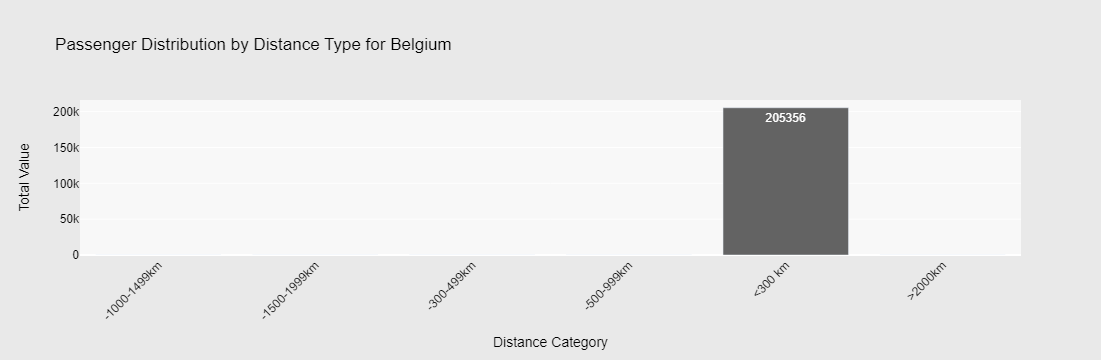

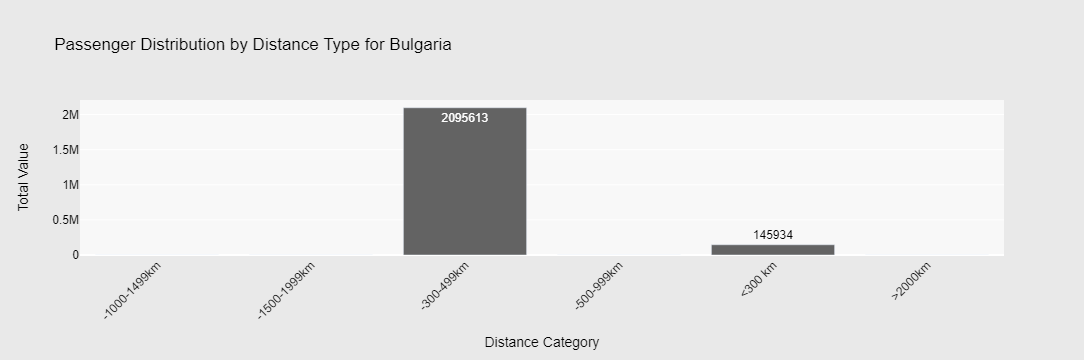

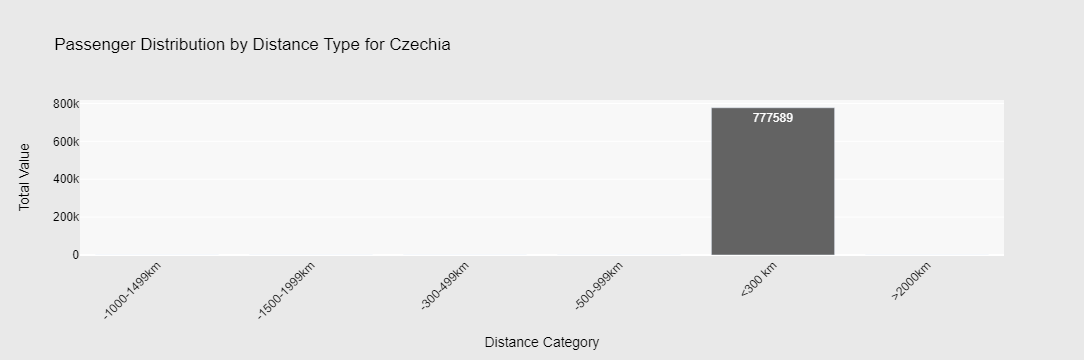

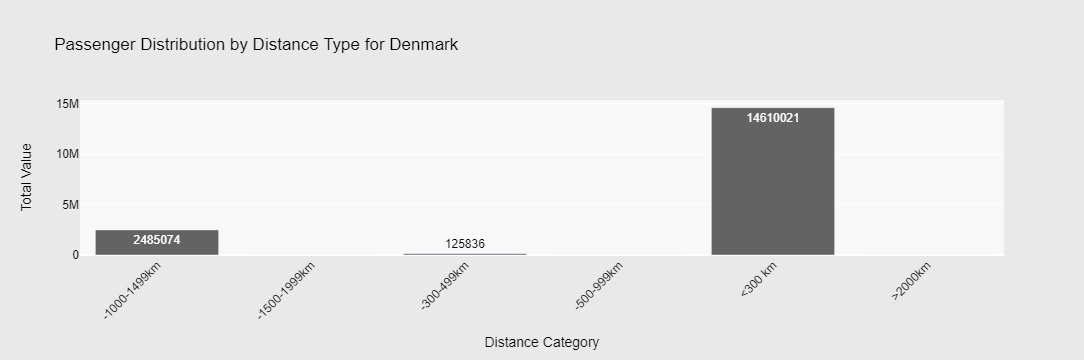

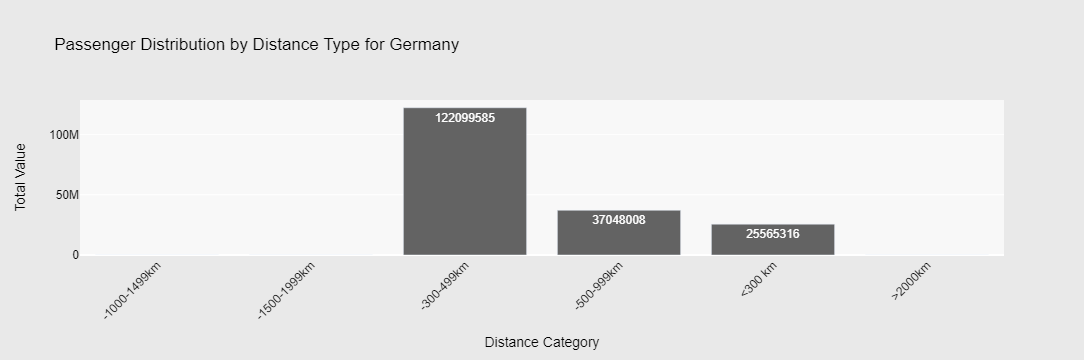

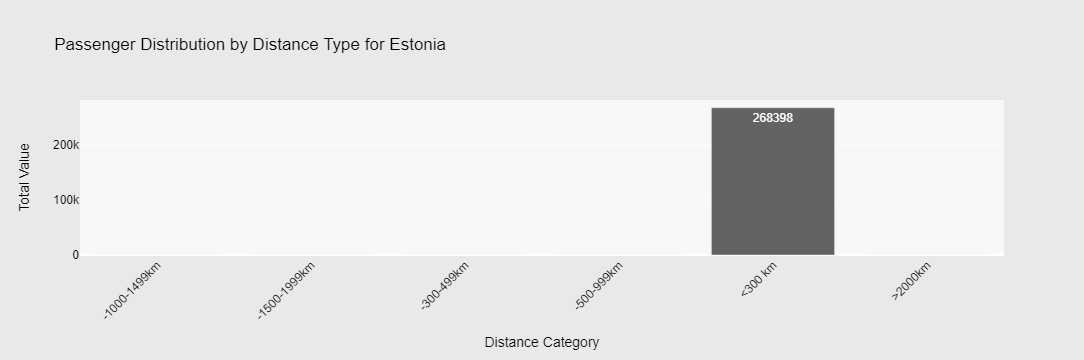

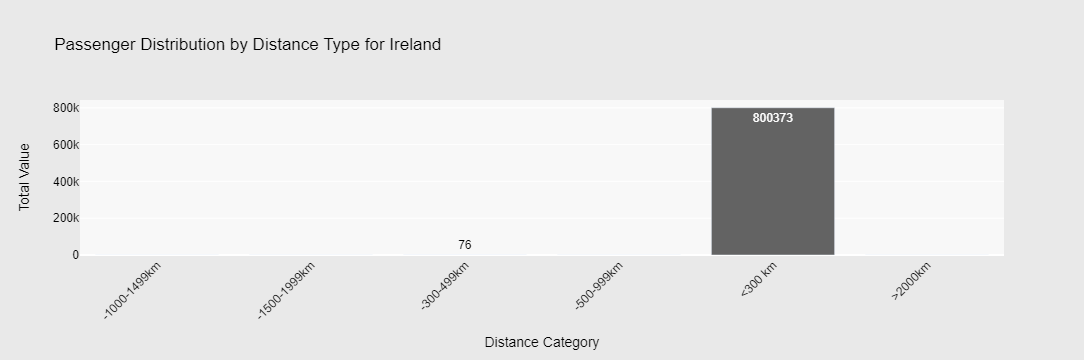

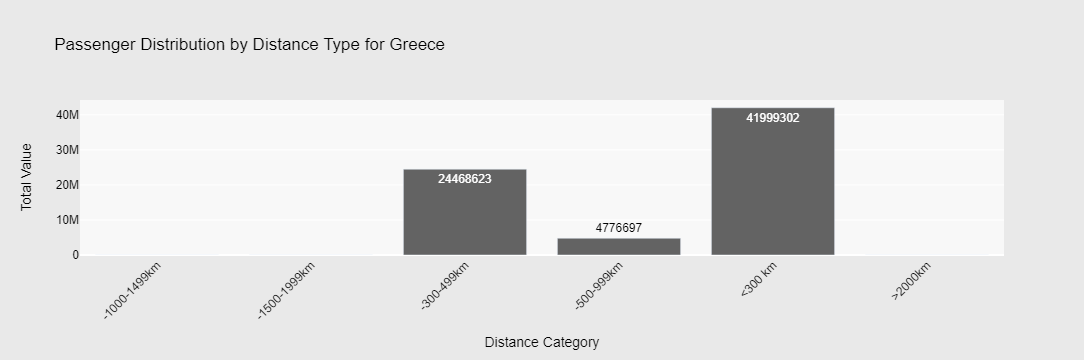

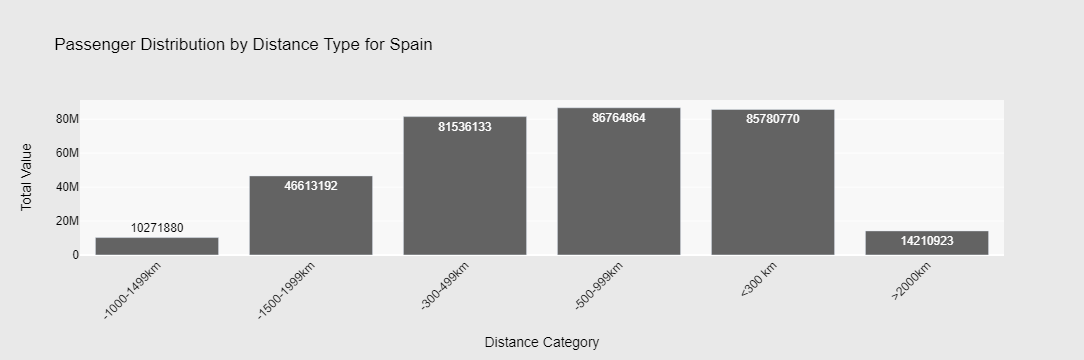

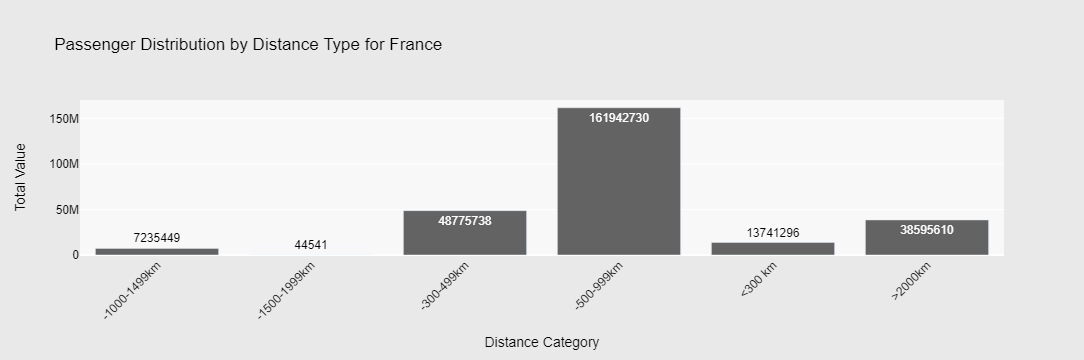

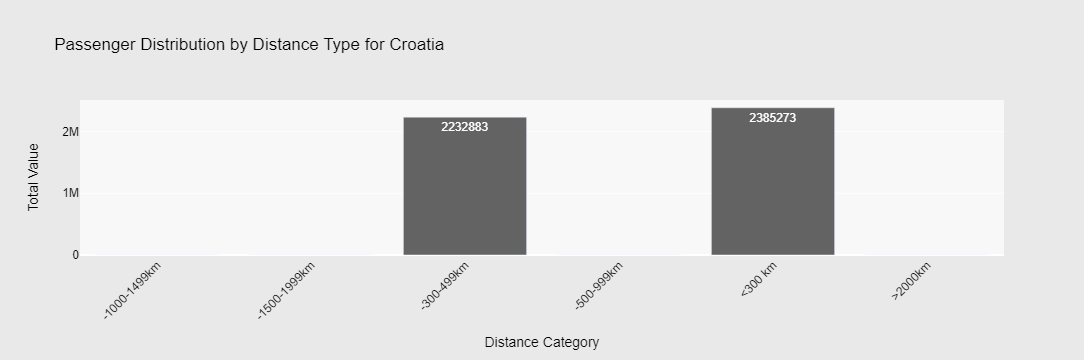

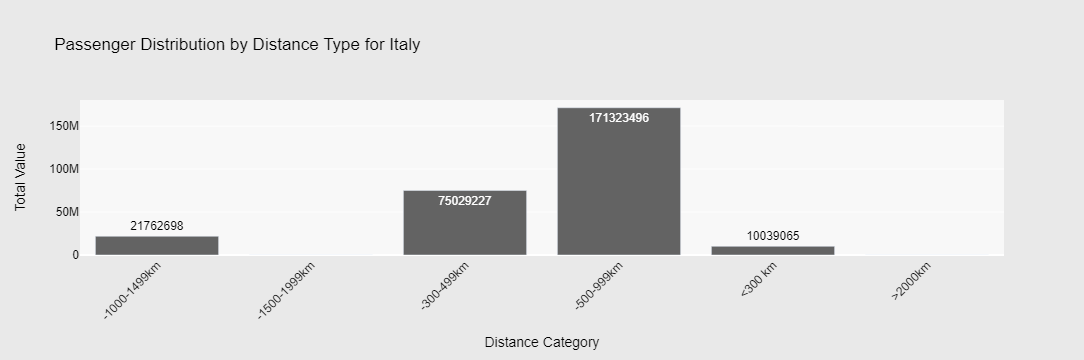

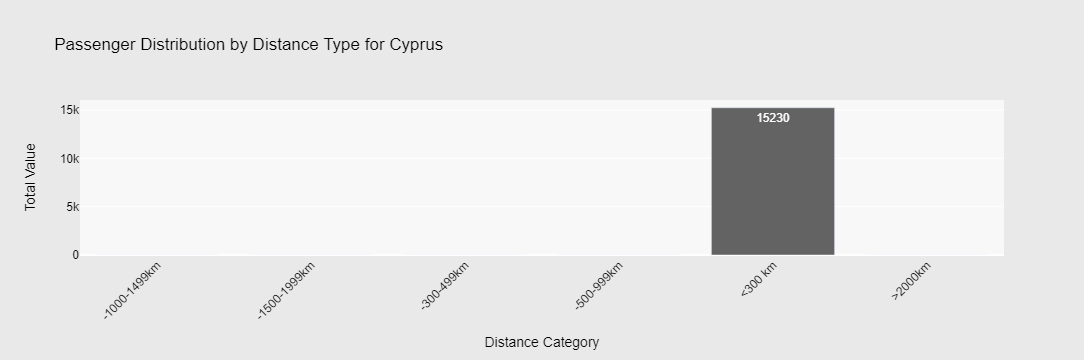

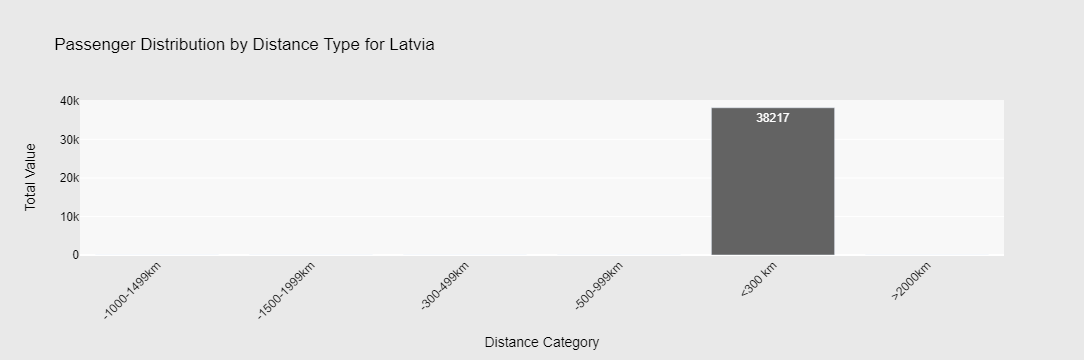

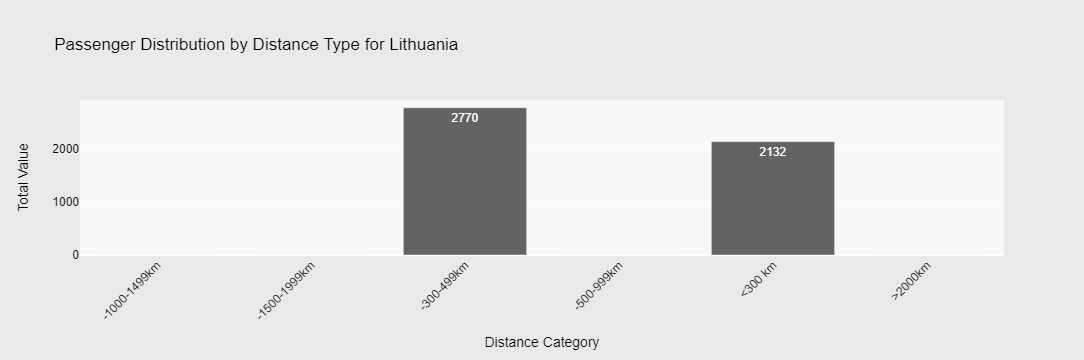

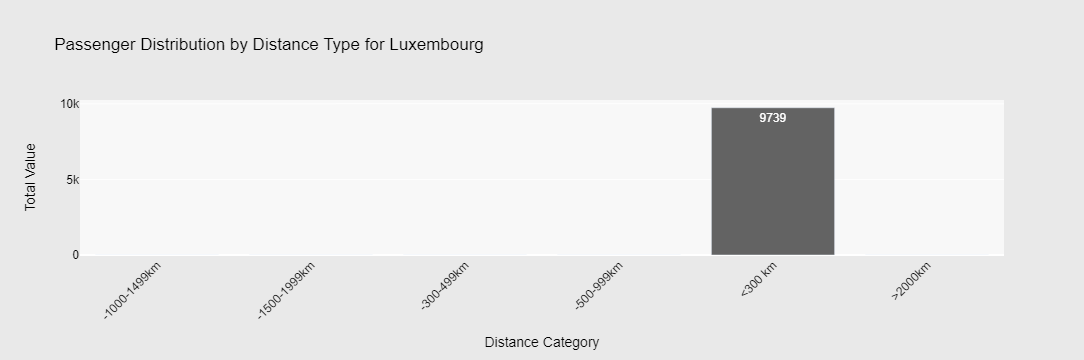

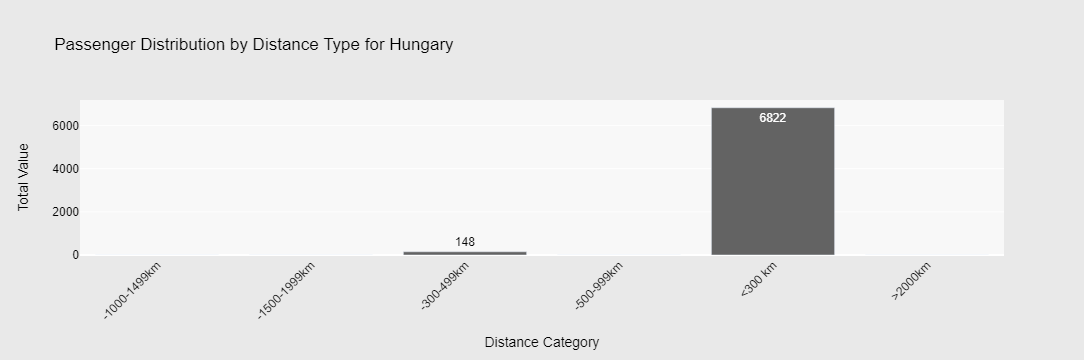

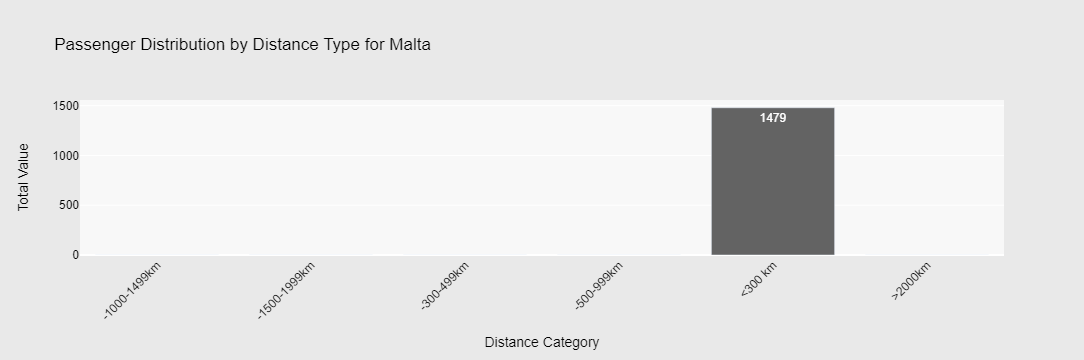

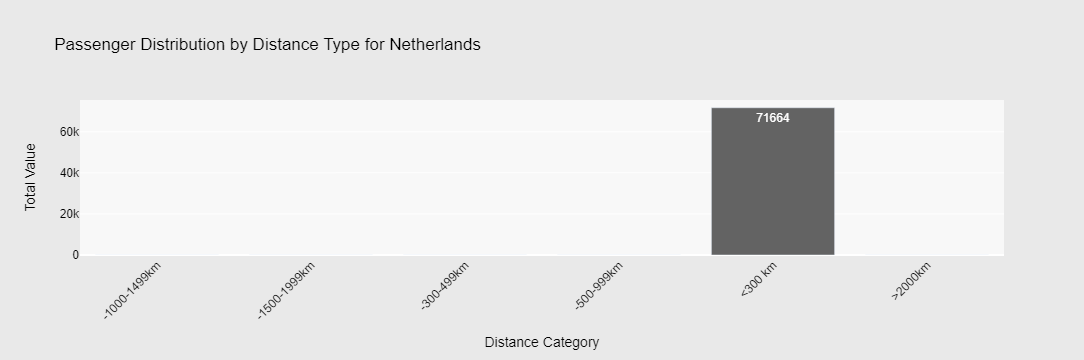

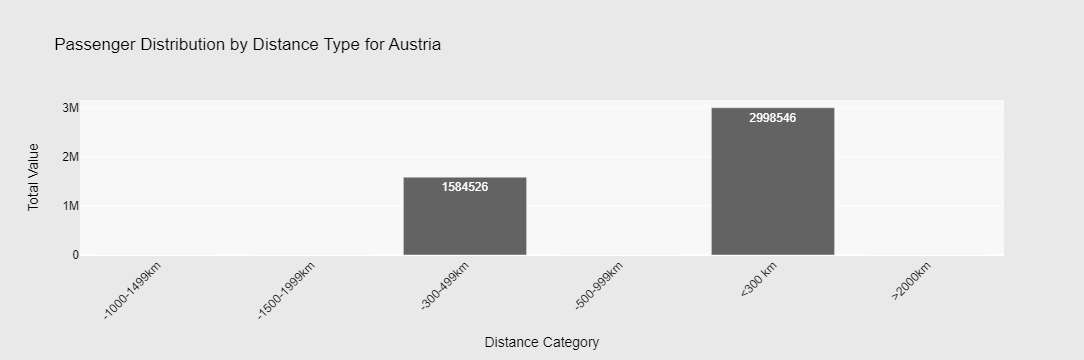

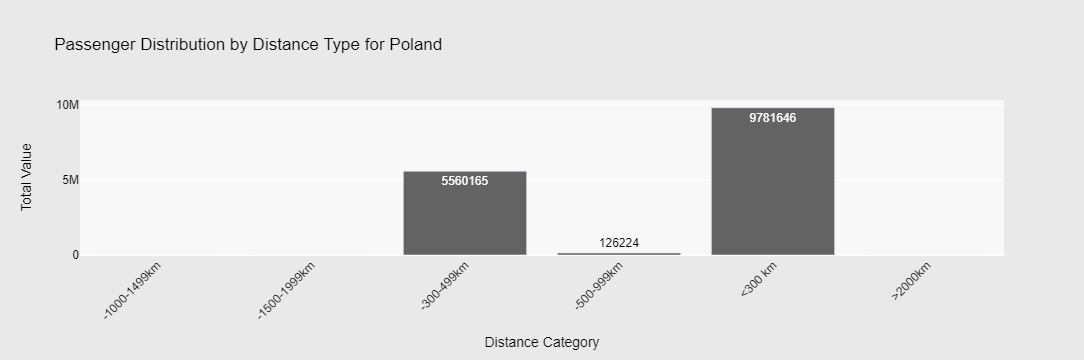

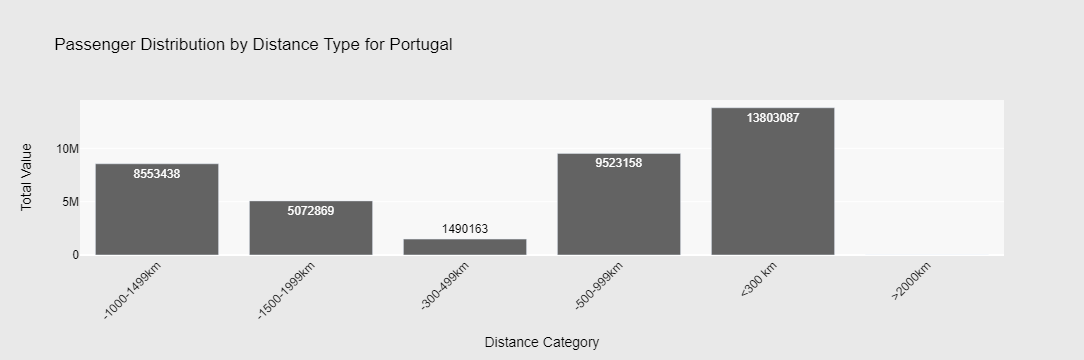

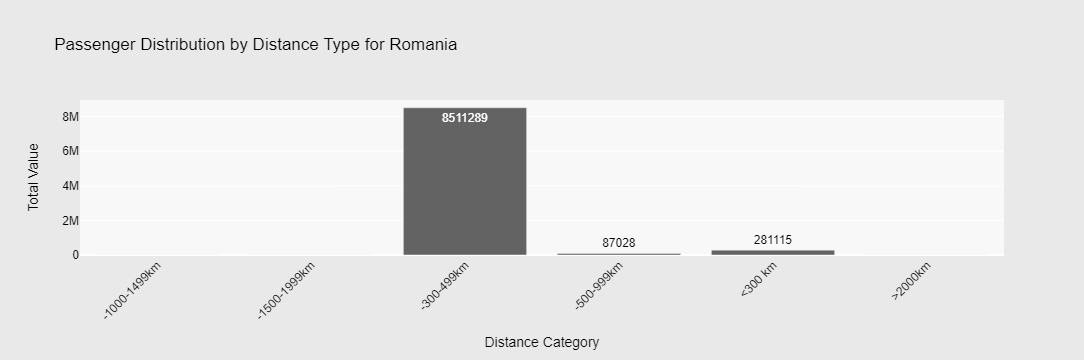

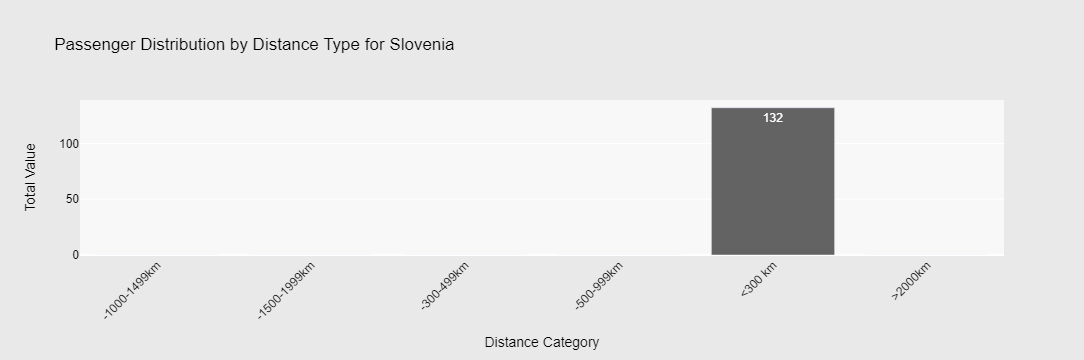

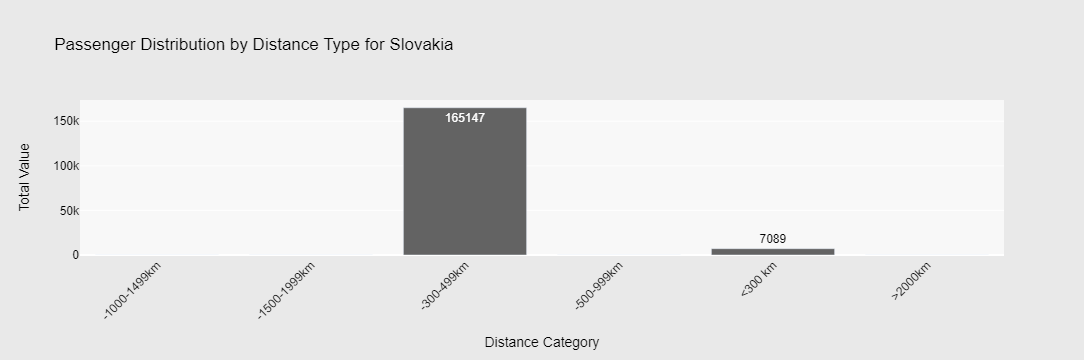

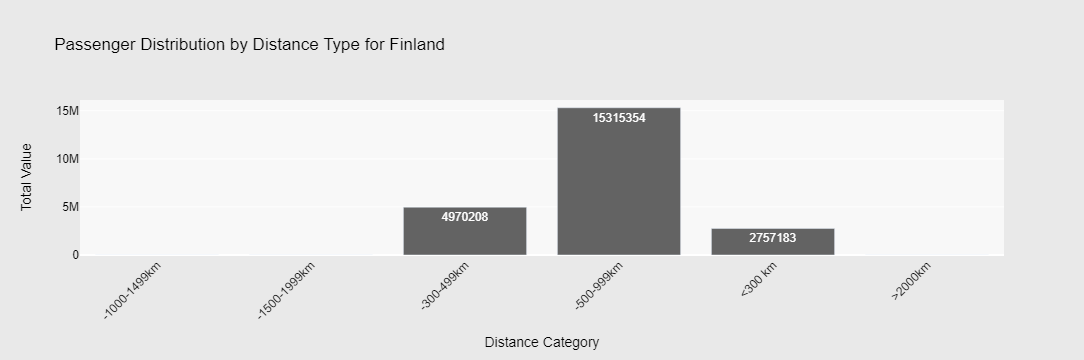

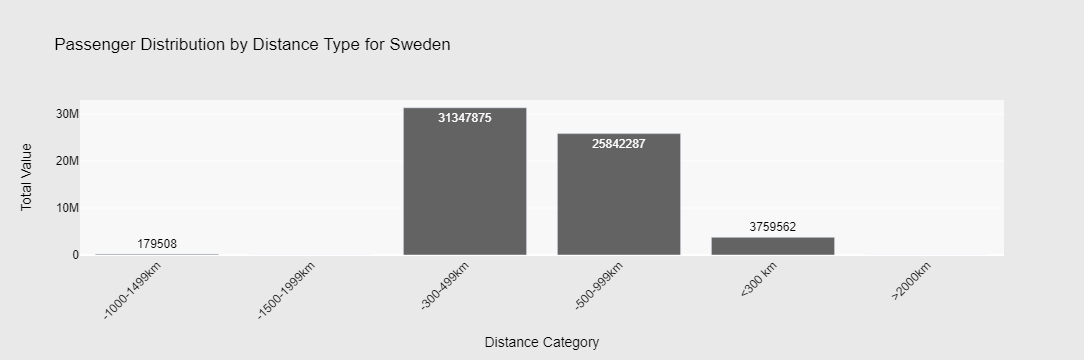

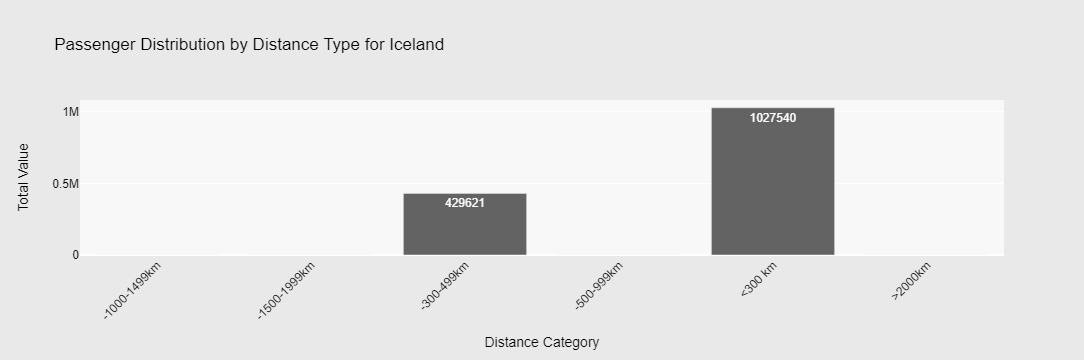

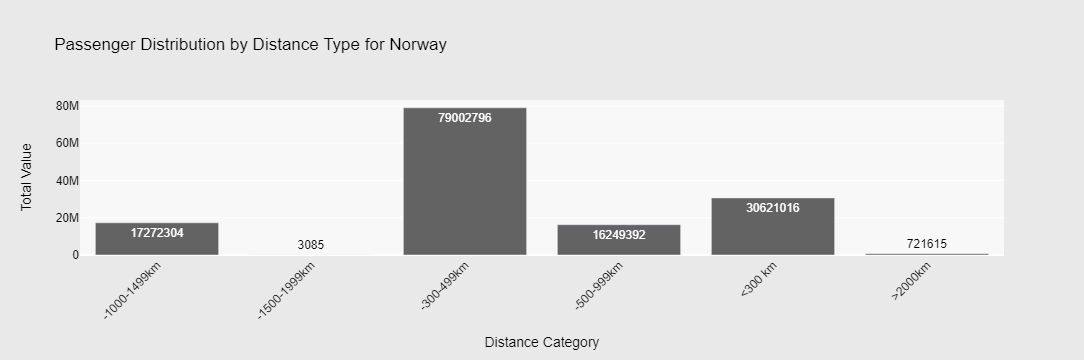

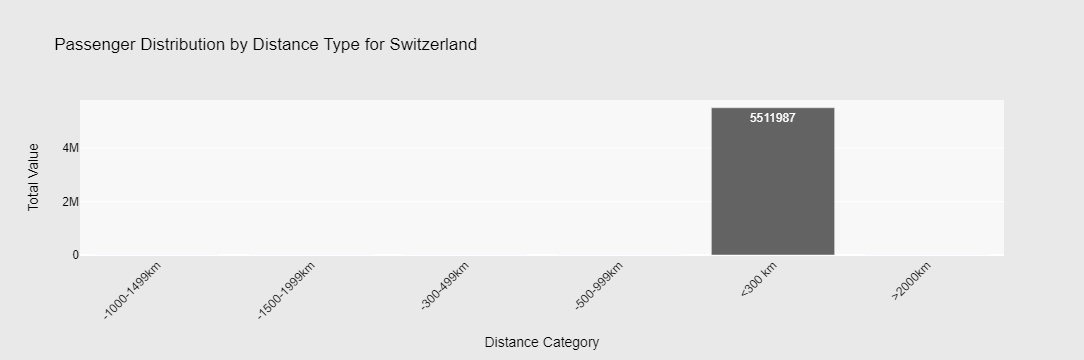

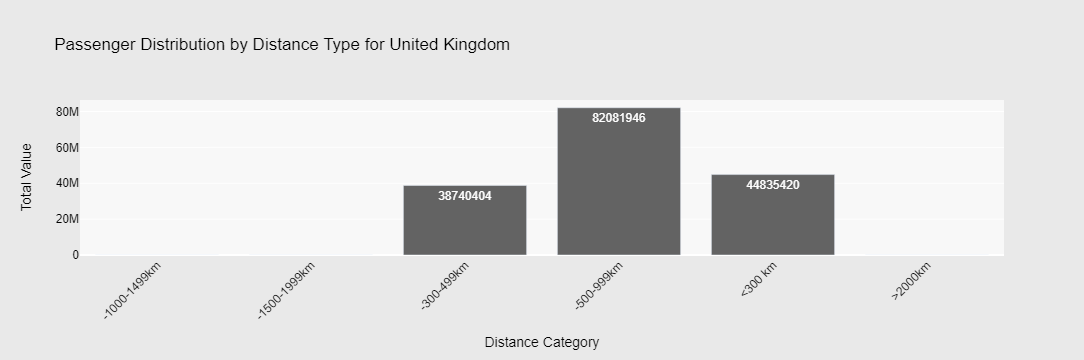

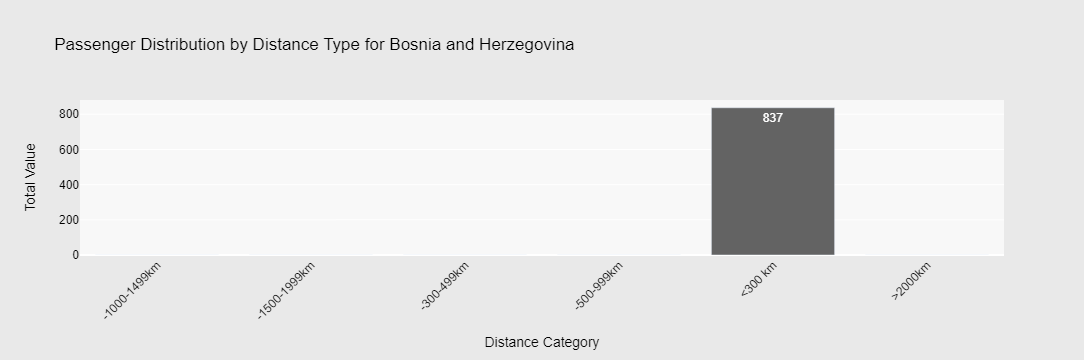

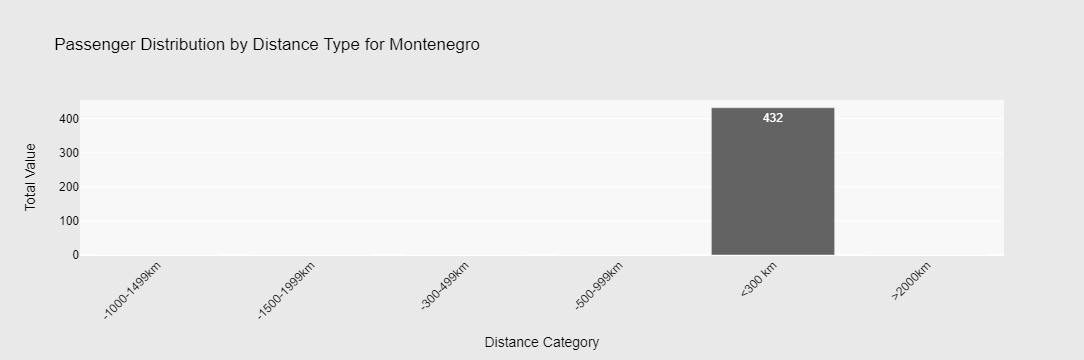

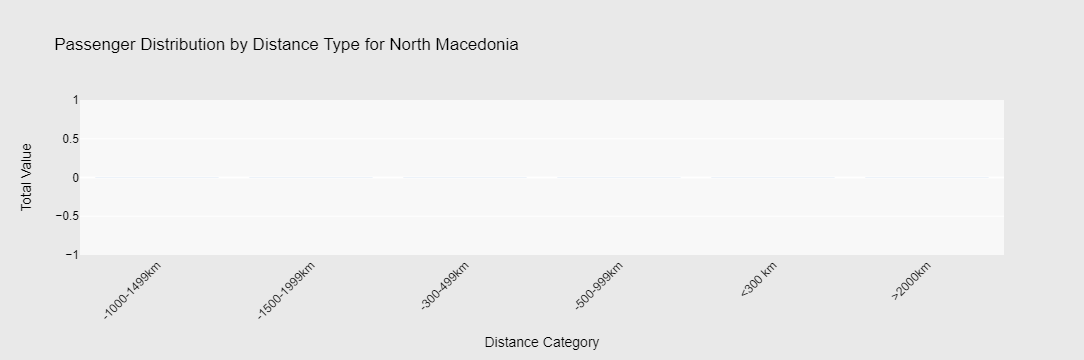

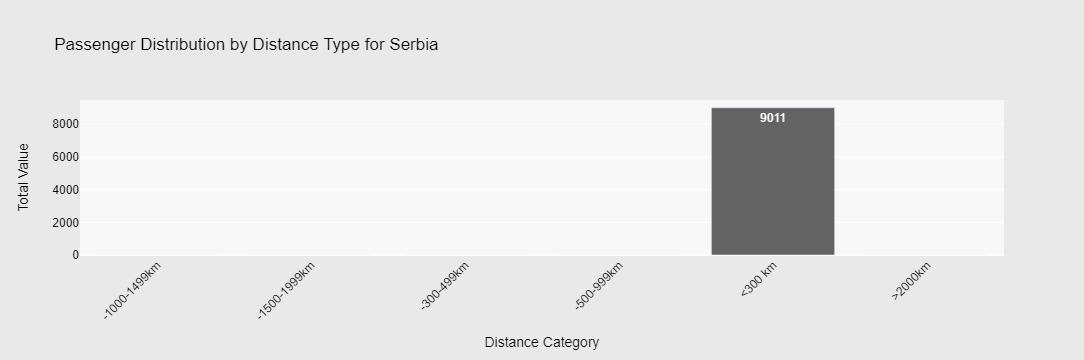

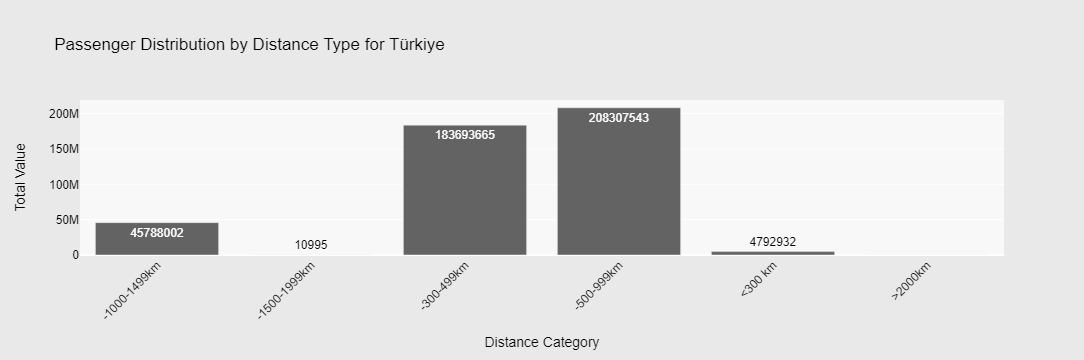

In [40]:
plot_distance_relevance_for_each_country(df_long)

In [16]:
# Aggregate data for overall popularity of distance types
overall_popularity = df_long.groupby('Distance')['Value'].sum().reset_index()
overall_popularity['Rank'] = overall_popularity['Value'].rank(method='max', ascending=False)

# Aggregate and rank data for popularity of distance types by country
country_popularity = df_long.groupby(['Country', 'Distance'])['Value'].sum().reset_index()
country_popularity['Rank'] = country_popularity.groupby('Country')['Value'].rank(method='max', ascending=False)


In [17]:
country_popularity

,Country,Distance,Value,Rank
0,Austria,-1000-1499km,0,6.0
1,Austria,-1500-1999km,0,6.0
2,Austria,-300-499km,1584526,2.0
3,Austria,-500-999km,0,6.0
4,Austria,<300 km,2998546,1.0
...,...,...,...,...
211,United Kingdom,-1500-1999km,0,6.0
212,United Kingdom,-300-499km,38740404,3.0
213,United Kingdom,-500-999km,82081946,1.0
214,United Kingdom,<300 km,44835420,2.0


In [18]:
def find_most_used_distance_by_country(df):
    """
    Finds the most used distance for each country based on the maximum aggregated value.
    
    Parameters:
    - df: DataFrame containing 'country', 'value', 'year', and 'distance' columns.
    
    Returns:
    - A DataFrame with each country and its most used distance type.
    """
    # Step 1: Aggregate values by country and distance
    agg_df = df.groupby(['Country', 'Distance'])['Value'].sum().reset_index()
    
    # Step 2: Find the distance with the maximum value for each country
    most_used_distances = agg_df.loc[agg_df.groupby('Country')['Value'].idxmax()]
    
    # Optional: Sort by country name for better readability
    most_used_distances.sort_values(by='Country', inplace=True)
    
    # Step 3: Create a list (or DataFrame) with country and its most used distance
    # If you prefer a list of tuples: [(country, distance), ...]
    most_used_list = list(zip(most_used_distances['Country'], most_used_distances['Distance']))
    
    return most_used_distances[['Country', 'Distance']]

In [19]:
most_used_distance_by_country_df = find_most_used_distance_by_country(df_long)

In [20]:
most_used_distance_by_country_df

,Country,Distance
4,Austria,<300 km
10,Belgium,<300 km
16,Bosnia and Herzegovina,<300 km
20,Bulgaria,-300-499km
28,Croatia,<300 km
34,Cyprus,<300 km
40,Czechia,<300 km
46,Denmark,<300 km
52,Estonia,<300 km
57,Finland,-500-999km


In [21]:
def find_most_used_distance_by_country_over_time(df):
    """
    Finds the most used distance for each country for every year based on the maximum aggregated value.
    
    Parameters:
    - df: DataFrame containing 'country', 'value', 'year', and 'distance' columns.
    
    Returns:
    - A DataFrame with each country, year, and its most used distance type.
    """
    # Step 1: Aggregate values by country, year, and distance
    agg_df = df.groupby(['Country', 'Year', 'Distance'])['Value'].sum().reset_index()
    
    # Step 2: Find the distance with the maximum value for each country and year
    most_used_distances = agg_df.loc[agg_df.groupby(['Country', 'Year'])['Value'].idxmax()]
    
    # Optional: Sort by country name and then year for better readability
    most_used_distances.sort_values(by=['Country', 'Year'], inplace=True)
    
    # Step 3: Create a list (or DataFrame) with country, year, and its most used distance
    # If you prefer a list of tuples: [(country, year, distance), ...]
    most_used_list = list(zip(most_used_distances['Country'], most_used_distances['Year'], most_used_distances['Distance']))
    
    return most_used_distances[['Country', 'Year', 'Distance']]


In [22]:
used_dist=find_most_used_distance_by_country_over_time(df_long)

In [23]:
used_dist['Year'] = used_dist['Year'].astype(str)


In [24]:
used_dist

,Country,Year,Distance
4,Austria,2013,<300 km
10,Austria,2014,<300 km
16,Austria,2015,<300 km
22,Austria,2016,<300 km
28,Austria,2017,<300 km
...,...,...,...
2133,United Kingdom,2018,-500-999km
2139,United Kingdom,2019,-500-999km
2145,United Kingdom,2020,-500-999km
2148,United Kingdom,2021,-1000-1499km


In [25]:
used_dist['Count'] = 1  # This is to indicate each row is a single occurrence

# Aggregate data if you have multiple rows per country, year, and distance
df_agg = used_dist.groupby(['Country', 'Year', 'Distance']).agg({'Count': 'sum'}).reset_index()

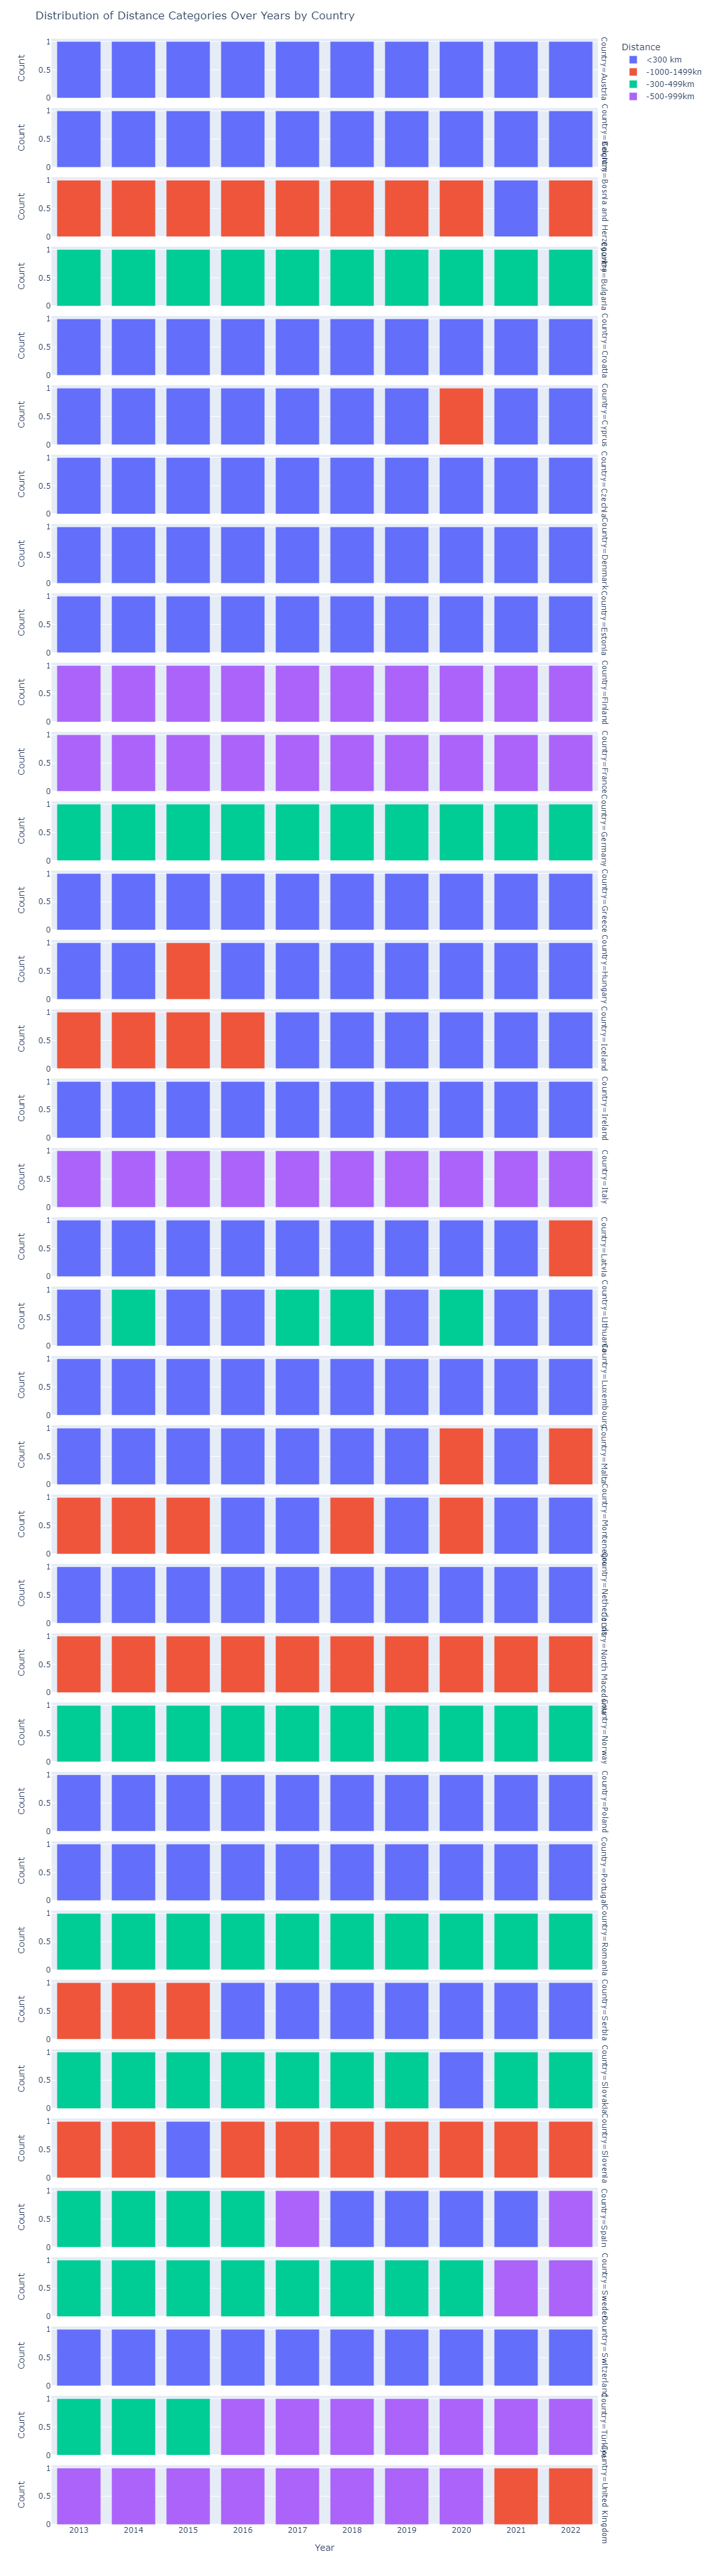

In [26]:
import plotly.express as px

# Assuming `df` is your DataFrame and it's already prepared for plotting
# Let's say `Country` is on the index, and we're faceting by 'Country' with 'Year' on the x-axis

fig = px.bar(df_agg, 
             x='Year', 
             y='Count', 
             color='Distance', 
             facet_row='Country', 
             height=4000,  # You might need to adjust this depending on the number of rows and your screen
             facet_row_spacing=0.004)  # Adjust this value as needed, this is just an example

# Update layout if needed
fig.update_layout(title='Distribution of Distance Categories Over Years by Country')
fig.update_yaxes(matches=None)  # This makes all y-axes independent, remove if you want them to be the same
fig.show()



In [27]:
most_used_list = most_used_distance_by_country_df.values.tolist()
print(most_used_list)

[['Austria', '<300 km'], ['Belgium', '<300 km'], ['Bosnia and Herzegovina', '<300 km'], ['Bulgaria', '-300-499km'], ['Croatia', '<300 km'], ['Cyprus', '<300 km'], ['Czechia', '<300 km'], ['Denmark', '<300 km'], ['Estonia', '<300 km'], ['Finland', '-500-999km'], ['France', '-500-999km'], ['Germany', '-300-499km'], ['Greece', '<300 km'], ['Hungary', '<300 km'], ['Iceland', '<300 km'], ['Ireland', '<300 km'], ['Italy', '-500-999km'], ['Latvia', '<300 km'], ['Lithuania', '-300-499km'], ['Luxembourg', '<300 km'], ['Malta', '<300 km'], ['Montenegro', '<300 km'], ['Netherlands', '<300 km'], ['North Macedonia', '-1000-1499km'], ['Norway', '-300-499km'], ['Poland', '<300 km'], ['Portugal', '<300 km'], ['Romania', '-300-499km'], ['Serbia', '<300 km'], ['Slovakia', '-300-499km'], ['Slovenia', '<300 km'], ['Spain', '-500-999km'], ['Sweden', '-300-499km'], ['Switzerland', '<300 km'], ['Türkiye', '-500-999km'], ['United Kingdom', '-500-999km']]


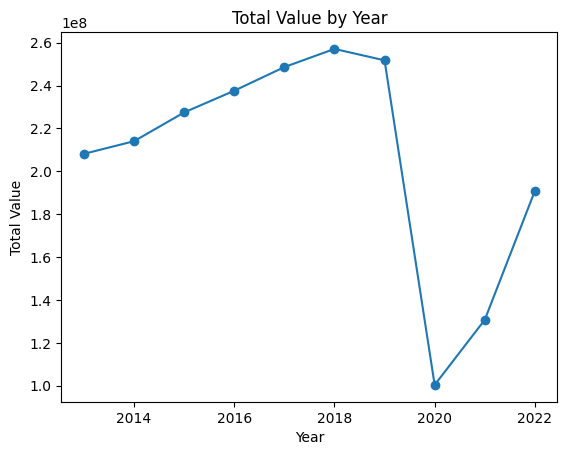

In [28]:
# Plot total values per year
df_long.groupby('Year')['Value'].sum().plot(kind='line', marker='o', ylabel='Total Value')
plt.title('Total Value by Year')
plt.show()
# this can be compared with a visualisation of the sheet total-total

In [29]:
# Assuming 'df_long' is your DataFrame and it has columns named 'Year', 'Country', and 'Value'

# Calculate yearly percentage change in values for each country
yearly_change_by_country = df_long.groupby(['Country', 'Year'])['Value'].sum().groupby(level=0).pct_change() * 100
yearly_change_by_country.fillna(0, inplace=True)
# Display the yearly percentage change for each country
yearly_change_by_country

Country         Year
Austria         2013      0.000000
                2014     -5.702716
                2015     -8.206602
                2016     -7.719213
                2017      6.581465
                           ...    
United Kingdom  2018      0.983219
                2019     -2.831422
                2020    -74.256507
                2021   -100.000000
                2022      0.000000
Name: Value, Length: 360, dtype: float64

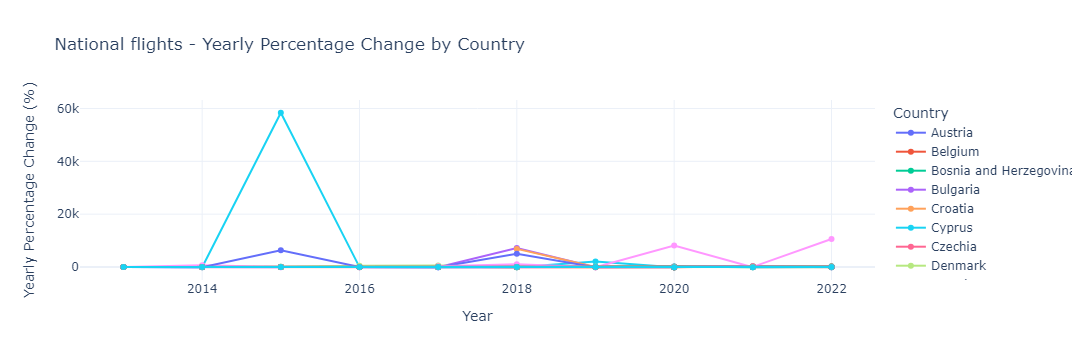

In [30]:
import plotly.express as px

# Convert the Series with MultiIndex into a DataFrame for easier plotting
yearly_change_df = yearly_change_by_country.reset_index(name='Yearly Change')

# Plotting with Plotly
fig = px.line(yearly_change_df,
              x='Year',
              y='Yearly Change',
              color='Country',
              title='National flights - Yearly Percentage Change by Country ',
              labels={'Yearly Change': 'Yearly Percentage Change (%)'},
              markers=True)

# Enhance layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Yearly Percentage Change (%)',
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


In [31]:
yearly_change_df

,Country,Year,Yearly Change
0,Austria,2013,0.000000
1,Austria,2014,-5.702716
2,Austria,2015,-8.206602
3,Austria,2016,-7.719213
4,Austria,2017,6.581465
...,...,...,...
355,United Kingdom,2018,0.983219
356,United Kingdom,2019,-2.831422
357,United Kingdom,2020,-74.256507
358,United Kingdom,2021,-100.000000


In [32]:
def convert_scientific_notation_to_float(value):
    try:
        # If the value is not 'inf', convert it to float
        if value.lower() != 'inf':
            return float(value)
    except AttributeError:
        # If value is already a float, return it as it is
        return value


In [33]:
# Apply this conversion to the 'Value' column of the dataframe
yearly_change_df['Yearly Change'] = yearly_change_df['Yearly Change'].apply(convert_scientific_notation_to_float)


In [34]:
yearly_change_df['Yearly Change'].unique()

array([ 0.00000000e+00, -5.70271589e+00, -8.20660162e+00, -7.71921267e+00,
        6.58146488e+00,  8.89384848e+00, -6.93607661e+00, -7.39028901e+01,
       -2.03734279e+01,  9.98848044e+01, -7.84973478e+00, -3.88010653e+01,
       -5.57154389e+01, -2.15406562e+01, -7.57575758e+00,  1.61748634e+01,
       -5.50141110e+01,  2.68255960e+02, -1.43043725e+01,             inf,
       -1.00000000e+02, -9.47709427e+00, -2.11464238e+00,  1.35336016e+00,
        6.56069675e+01,  1.06108115e+01, -6.92566419e+00, -5.45286058e+01,
        5.84464913e+01,  1.30717598e+01,  1.32784703e+00, -5.66092826e-01,
        4.15192827e+00,  5.59084898e+00,  7.97859726e-01, -3.42932827e+00,
       -6.62836086e+01,  3.63550727e+01,  5.23859805e+01, -9.09836066e+01,
        5.83909091e+04, -3.66801368e+01, -9.81345115e+01, -9.86842105e+01,
        2.10000000e+03,  7.68187423e+01,  2.67697178e+00,  1.76790479e+01,
       -3.14651418e+01, -2.00013583e+01,  7.95566174e+00, -5.21934013e+01,
       -7.77399192e+01,  

In [35]:
def fit_predict_plot(df, num_future_years=5):
    # Assuming 'df' is a DataFrame with columns 'Country', 'Year', 'Yearly Change'
    countries = df['Country'].unique()

    for country in countries:
        country_data = df[df['Country'] == country]
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['Yearly Change'].values
        
        # Fit model
        model = LinearRegression()
        model.fit(X, y)
        
        # Prepare future years for prediction
        future_years = np.array([X.max() + i for i in range(1, num_future_years + 1)]).reshape(-1, 1)
        
        # Predict future changes
        future_changes = model.predict(future_years)
        
        # Visualization
        fig = go.Figure()
        # Plot historical data
        fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name='Historical Change'))
        # Plot predictions
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=future_changes, mode='lines+markers', name='Predicted Change', line=dict(dash='dash')))
        
        # Layout adjustments
        fig.update_layout(title=f'Predicted Yearly Percentage Change for {country}',
                          xaxis_title='Year',
                          yaxis_title='Yearly Percentage Change (%)',
                          template='plotly_white')
        fig.show()


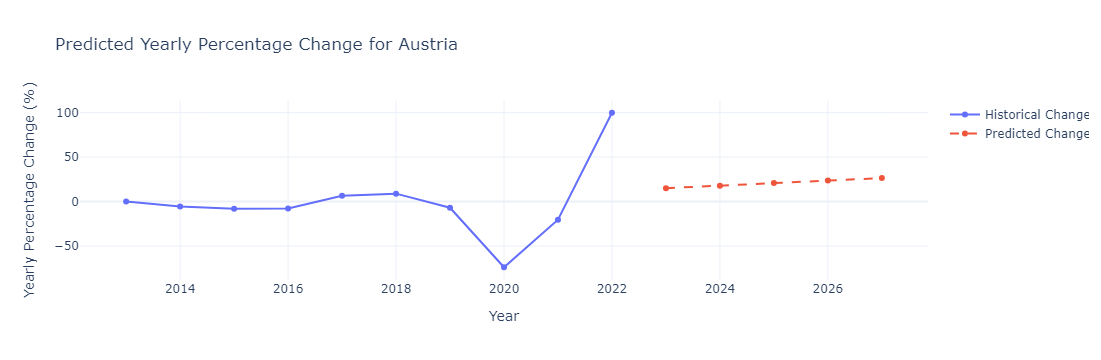

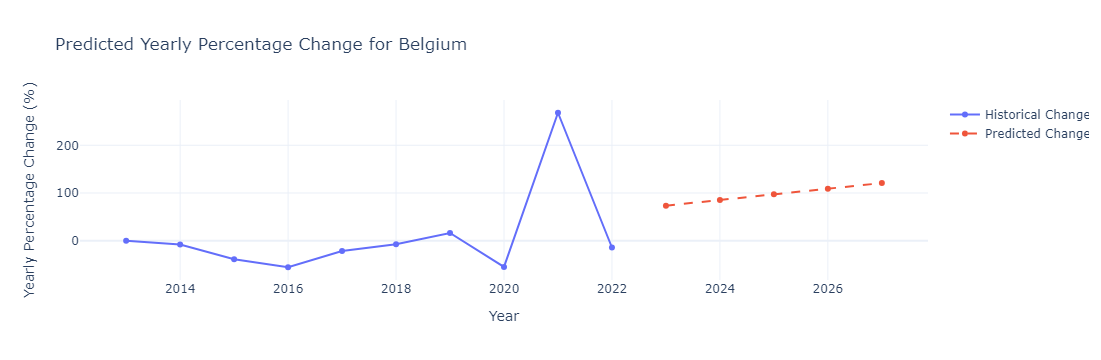

ValueError: Input y contains infinity or a value too large for dtype('float64').

In [36]:
fit_predict_plot(yearly_change_df, num_future_years=5)

In [ ]:
def plot_trends_with_predictions(df, num_future_years=5):
    # Assuming 'df' is a DataFrame with columns 'Country', 'Year', 'Distance', and 'Value'
    
    # Create a unique identifier for each country-distance pair
    df['Country_Distance'] = df['Country'] + ' - ' + df['Distance'].astype(str)
    
    # Get unique country-distance pairs for dropdown options
    unique_pairs = df['Country_Distance'].unique()
    
    # Initialize figure with subplots
    fig = make_subplots(rows=1, cols=1)
    
    # Temporary container for dropdown buttons
    dropdown_buttons = []
    
    # Add traces for each country-distance pair
    for pair in unique_pairs:
        df_sub = df[df['Country_Distance'] == pair]
        
        # Linear Regression for predictions
        model = LinearRegression()
        X = df_sub['Year'].values.reshape(-1, 1)
        y = df_sub['Value'].values
        model.fit(X, y)
        
        # Predict for future years
        future_years = np.array([X.max() + i for i in range(1, num_future_years + 1)]).reshape(-1, 1)
        future_predictions = model.predict(future_years)
        
        # Add historical trend line
        fig.add_trace(
            go.Scatter(x=df_sub['Year'], y=df_sub['Value'], mode='lines+markers', name=f"{pair} Historical", visible=False),
            row=1, col=1
        )
        
        # Add future prediction line
        fig.add_trace(
            go.Scatter(x=future_years.flatten(), y=future_predictions, mode='lines+markers', name=f"{pair} Prediction", visible=False, line=dict(dash='dash')),
            row=1, col=1
        )
        
        # Add button for the pair
        dropdown_buttons.append(
            {"label": pair, 
             "method": "update", 
             "args": [{"visible": [True if val == pair else False for val in df['Country_Distance'].unique() for _ in (0, 1)] + [False] * len(unique_pairs) * 2,
                       # This line ensures that for each pair, both the historical and prediction lines are made visible together
                       "title": f"Trend and Prediction for {pair}"}]}
        )
    
    # Make the first pair's data visible
    fig.data[0].visible = True
    fig.data[1].visible = True  # Make sure the prediction for the first pair is also visible
    
    # Update layout with dropdown
    fig.update_layout(
        updatemenus=[{
            "buttons": dropdown_buttons,
            "direction": "down",
            "showactive": True,
        }],
        title_text="Trend and Prediction Analysis by Country and Distance Category",
        xaxis_title="Year",
        yaxis_title="Value"
    )
    
    # Show figure
    fig.show()


In [ ]:
plot_trends_with_predictions(df_long, 5)

# Data based on different AC types and different distances

In [ ]:
url="/home/anamaria/code/nusero92/aviation/avia_paodis__custom_9158704_spreadsheet.xlsx"
nat=pd.ExcelFile(url)
sheet_names_nat_all_ac = list(chain(nat.sheet_names[8:14], nat.sheet_names[15:21], nat.sheet_names[22:28], nat.sheet_names[29:35], nat.sheet_names[36:42], nat.sheet_names[43:49]))
dfs_nat_all_ac = [nat.parse(sheet_name) for sheet_name in sheet_names_nat_all_ac]
dfs_nat_all_ac

In [ ]:
base_nat_all_ac = dfs_nat_all_ac[0]

try:
    # Loop through the rest of the DataFrames and join them one by one, using sheet names as suffixes
    for i, df in enumerate(dfs_nat_all_ac[1:], start=1):  # Start at 1 to include all but the first df
        # Use the sheet name for the suffix. Ensure it's a valid string that can be used as a suffix.
        # For example, replace spaces with underscores if necessary
        sheet_name_suffix_nat = sheet_names_nat_all_ac[i].replace(' ', '_')
        suffixes_nat = ('', f'_{sheet_name_suffix_nat}')  # Custom suffix for each joined DataFrame
        
        # Perform the merge operation and update base_df_all_ac each time
        base_nat_all_ac = pd.merge(base_nat_all_ac, df, on='Country', how='outer', suffixes=suffixes_nat)
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
base_nat_all_ac=base_nat_all_ac.replace(":", 0)

In [ ]:
#base_nat_all_ac = base_nat_all_ac[base_nat_all_ac["Country"] != "nb"]

In [ ]:
base_nat_all_ac.info()

In [ ]:
# Melt the DataFrame to go from wide to long format
df_ac_type = pd.melt(base_nat_all_ac, id_vars=['Country'], var_name='Year_AcType_Distance', value_name='Value')

In [ ]:
df_ac_type.Year_AcType_Distance.unique()

In [ ]:
df_ac_type[['Year', 'AcType']] = df_ac_type['Year_AcType_Distance'].str.extract(
    r'(\d{4})'                                        # Capture the year
    r'(?:_([a-z]{2,3}))?' )                            # Optionally capture the aircraft type                      


In [ ]:
# Revised approach focusing on distance extraction
df_ac_type['Distance'] = df_ac_type['Year_AcType_Distance'].str.extract(
    r'(?:\d{4}_?[a-zA-Z]*[>_]?-?)(\d+km|\d+-\d+km|[><]\d+km)'
)

In [ ]:
# Convert data types
df_ac_type['Year'] = pd.to_numeric(df_ac_type['Year'])
df_ac_type['Value'] = pd.to_numeric(df_ac_type['Value'], errors='coerce')  # Convert to numeric, make errors NaN

In [ ]:
df_ac_type["AcType"].fillna("jj", inplace=True)

In [ ]:
df_ac_type["Distance"].fillna("<300km", inplace=True)

In [ ]:
df_ac_type

In [ ]:
df_ac_type.isna().sum()

In [ ]:
df_ac_type.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_ac_type is your DataFrame
# Step 4: Trend Analysis per Aircraft Type and Year
trend_analysis = df_ac_type.groupby(['Year', 'AcType'])['Value'].sum().unstack()
trend_analysis.plot(kind='line', figsize=(10, 6))
plt.title('Trend of Usage per Aircraft Type over Years')
plt.ylabel('Total Usage Value')
plt.xlabel('Year')
plt.legend(title='AcType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 5: Distance Usage Analysis
distance_usage = df_ac_type.groupby(['AcType', 'Distance'])['Value'].sum().unstack()
distance_usage.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Usage of Aircraft Type by Distance')
plt.ylabel('Total Usage Value')
plt.xlabel('Aircraft Type')
plt.xticks(rotation=45)
plt.legend(title='Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_ac_type is your DataFrame

# Step 1: Trend Analysis per Country, Aircraft Type, and Year
for country in df_ac_type['Country'].unique():
    df_filtered = df_ac_type[df_ac_type['Country'] == country]
    trend_analysis = df_filtered.groupby(['Year', 'AcType'])['Value'].sum().unstack()
    trend_analysis.plot(kind='line', figsize=(10, 6))
    plt.title(f'Trend of Usage per Aircraft Type over Years in {country}')
    plt.ylabel('Total Usage Value')
    plt.xlabel('Year')
    plt.legend(title='AcType', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Step 2: Distance Usage Analysis per Country
for country in df_ac_type['Country'].unique():
    df_filtered = df_ac_type[df_ac_type['Country'] == country]
    distance_usage = df_filtered.groupby(['AcType', 'Distance'])['Value'].sum().unstack()
    distance_usage.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Usage of Aircraft Type by Distance in {country}')
    plt.ylabel('Total Usage Value')
    plt.xlabel('Aircraft Type')
    plt.xticks(rotation=45)
    plt.legend(title='Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of all countries
countries = df_ac_type['Country'].unique()

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Trend of Usage per Aircraft Type over Years', 'Usage of Aircraft Type by Distance'))

# Initialize traces for the first plot (Trend Analysis) and second plot (Distance Usage) with all invisible
for country in countries:
    filtered_df = df_ac_type[df_ac_type['Country'] == country]
    
    # Trend Analysis Data Preparation
    trend_analysis = filtered_df.groupby(['Year', 'AcType'])['Value'].sum().reset_index()
    for ac_type in trend_analysis['AcType'].unique():
        df_actype = trend_analysis[trend_analysis['AcType'] == ac_type]
        fig.add_trace(go.Scatter(x=df_actype['Year'], y=df_actype['Value'], mode='lines',
                                 name=ac_type, legendgroup=country, showlegend=False, visible=False), row=1, col=1)
    
    # Distance Usage Data Preparation
    distance_usage = filtered_df.groupby(['AcType', 'Distance'])['Value'].sum().reset_index()
    for ac_type in distance_usage['AcType'].unique():
        for distance in distance_usage['Distance'].unique():
            df_filtered = distance_usage[(distance_usage['AcType'] == ac_type) & (distance_usage['Distance'] == distance)]
            if not df_filtered.empty:
                fig.add_trace(go.Bar(x=[ac_type], y=df_filtered['Value'], name=distance, legendgroup=f"{country}_{distance}", showlegend=False, visible=False), row=1, col=2)

# Define buttons for the dropdown
buttons = []

# Make traces of the first country visible and adjust titles dynamically
first_country = countries[0]
for i, trace in enumerate(fig.data):
    if trace.legendgroup.startswith(first_country):
        fig.data[i].visible = True
        if i < len(fig.data) // 2:  # Assuming the first half of traces are for the first plot
            fig.data[i].showlegend = True

# Update buttons for each country to control visibility across both plots
for country in countries:
    args = [{"visible": [country == trace.legendgroup or f"{country}_" in trace.legendgroup for trace in fig.data]}]
    
    buttons.append(dict(label=country, method="update", args=args))

# Adding dropdown menus to the layout
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.2,
        "yanchor": "top"
    }]
)

fig.show()


In [ ]:
# Assuming df_ac_type is prepared similarly as before
countries = df_ac_type['Country'].unique()

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Trend of Usage per Aircraft Type over Years', 'Usage of Aircraft Type by Distance'))

# Initialize traces for the first plot (Trend Analysis) and second plot (Distance Usage)
for country in countries:
    filtered_df = df_ac_type[df_ac_type['Country'] == country]
    
    # Trend Analysis Data Preparation
    trend_analysis = filtered_df.groupby(['Year', 'AcType'])['Value'].sum().reset_index()
    for ac_type in trend_analysis['AcType'].unique():
        df_actype = trend_analysis[trend_analysis['AcType'] == ac_type]
        
        if len(df_actype) > 1:  # Ensure there's enough data for regression
            # Linear Regression Model
            X = df_actype[['Year']].values.reshape(-1, 1)
            y = df_actype['Value']
            model = LinearRegression()
            
            try:
                model.fit(X, y)
                
                # Predict future values
                future_years = np.array([[year] for year in range(2023, 2028)])  # Example: Predicting for 2023 to 2027
                future_values = model.predict(future_years)
                
                # Add historical trend line
                fig.add_trace(go.Scatter(x=df_actype['Year'], y=df_actype['Value'], mode='lines', name=f"{ac_type} {country}", visible=False), row=1, col=1)
                
                # Add predicted future trend line
                fig.add_trace(go.Scatter(x=future_years.flatten(), y=future_values, mode='lines+markers', name=f"Predicted {ac_type} {country}", visible=False, line=dict(dash='dot')), row=1, col=1)
            except Exception as e:
                print(f"Error fitting model for {ac_type} in {country}: {e}")

# Define buttons for the dropdown
buttons = []

for country in countries:
    country_visible = [True if trace.name.endswith(country) else False for trace in fig.data]
    buttons.append(dict(label=country, method="update", args=[{"visible": country_visible}]))

# Adding dropdown menus to the layout
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title_text="Aircraft Usage Analysis"
)

fig.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Assuming df_ac_type is prepared similarly as before
countries = df_ac_type['Country'].unique()

# Predicting for 2023 to 2027
future_years = np.array([[year] for year in range(2023, 2028)]) 

for country in countries:
    filtered_df = df_ac_type[df_ac_type['Country'] == country]
    
    # Trend Analysis for each Aircraft Type
    trend_analysis = filtered_df.groupby(['Year', 'AcType'])['Value'].sum().reset_index()
    for ac_type in trend_analysis['AcType'].unique():
        df_actype = trend_analysis[trend_analysis['AcType'] == ac_type]
        
        if len(df_actype) > 1:  # Ensure there's enough data for regression
            X = df_actype[['Year']].values.reshape(-1, 1)
            y = df_actype['Value']
            model = LinearRegression().fit(X, y)
            
            # Predict future values
            future_values = model.predict(future_years)
            
            # Create figure for Trend Analysis
            fig_trend = go.Figure()
            fig_trend.add_trace(go.Scatter(x=df_actype['Year'], y=df_actype['Value'], mode='lines+markers', name='Historical Data'))
            fig_trend.add_trace(go.Scatter(x=future_years.flatten(), y=future_values, mode='lines+markers', name='Predictions', line=dict(dash='dot')))
            fig_trend.update_layout(title=f'Trend Analysis for {country} - {ac_type}', xaxis_title='Year', yaxis_title='Value', template='plotly_white')
            fig_trend.show()
            
        else:
            print(f"Not enough data to predict trend for {ac_type} in {country}.")
    
    # Distance Usage Analysis (assuming there's enough data)
    # This part is simplified and does not include predictive modeling since it's not straightforward how to predict categorical data without a clear time series.
    # If you have specific logic or models for predicting distance usage, that logic would need to be incorporated here.
    distance_usage = filtered_df.groupby(['AcType', 'Distance'])['Value'].sum().reset_index()
    for ac_type in distance_usage['AcType'].unique():
        fig_distance = go.Figure()
        df_ac_distance = distance_usage[distance_usage['AcType'] == ac_type]
        for _, row in df_ac_distance.iterrows():
            fig_distance.add_trace(go.Bar(x=[row['Distance']], y=[row['Value']], name=ac_type))
        fig_distance.update_layout(title=f'Usage of {ac_type} by Distance for {country}', xaxis_title='Distance', yaxis_title='Value', template='plotly_white')
        fig_distance.show()



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def predict_distance_usage_growth(filtered_df, future_years):
    """
    A simplified approach to predict future usage by distance based on overall growth rates.
    This assumes that the growth rate observed in the trend analysis can be applied to distance categories.
    """
    # Example: Calculate the overall growth rate from trend analysis
    yearly_totals = filtered_df.groupby('Year')['Value'].sum()
    X = np.array(yearly_totals.index).reshape(-1, 1)
    y = yearly_totals.values
    model = LinearRegression().fit(X, y)
    
    # Predict future total values
    future_values_total = model.predict(future_years)
    
    # Calculate the growth rate
    if len(y) > 1:
        last_year_total = y[-1]
        growth_rate = (future_values_total[0] - last_year_total) / last_year_total
    else:
        growth_rate = 0
    
    return growth_rate

# Apply this in your plotting and prediction loop for distance usage
for country in countries:
    filtered_df = df_ac_type[df_ac_type['Country'] == country]
    
    # Assume future_years is defined as np.array([[year] for year in range(2023, 2028)])
    growth_rate = predict_distance_usage_growth(filtered_df, future_years)
    
    # Now, apply this growth rate to predict future usage by distance
    distance_usage = filtered_df.groupby(['AcType', 'Distance'])['Value'].sum().reset_index()
    
    # Assuming you have a way to determine the last year's data for each distance category
    # Here we simplify by applying the growth rate uniformly across distance categories
    for ac_type in distance_usage['AcType'].unique():
        fig_distance = go.Figure()
        df_ac_distance = distance_usage[distance_usage['AcType'] == ac_type]
        for _, row in df_ac_distance.iterrows():
            future_value = row['Value'] * (1 + growth_rate)
            # Plot historical data
            fig_distance.add_trace(go.Bar(x=[row['Distance']], y=[row['Value']], name=ac_type))
            # Plot predicted future value
            fig_distance.add_trace(go.Bar(x=[row['Distance']], y=[future_value], name=f"Predicted {ac_type}"))
        
        fig_distance.update_layout(title=f'Usage of {ac_type} by Distance for {country} (with Predictions)', xaxis_title='Distance', yaxis_title='Value', template='plotly_white')
        fig_distance.show()
